# Portfolio Optimization: Theory and practical Pitfalls

## Getting Started

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

In [ ]:
returns = df.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.005, summary.loc[i, "CAGR"]+0.005), size = 10)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()

## 2-Asset-Case (Intro)

In [ ]:
summary

In [ ]:
assets = ["WMT", "AAPL"]

In [ ]:
subset = summary.loc[assets]
subset

In [ ]:
subset.columns = ["Risk", "Return"]
subset

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 50, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.005, subset.loc[i, "Return"] + 0.005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Portfolio Return (2-Asset-Case)

In [ ]:
nop = 100

In [ ]:
w_A = np.linspace(0, 1, nop)
w_A

In [ ]:
w_B = 1 - w_A
w_B

In [ ]:
weights = np.vstack((w_A, w_B)).T
weights

In [ ]:
w2 = weights[1]
w2

In [ ]:
subset

__Portfolio Returns__ (weighted average)

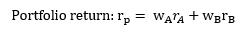

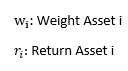

In [ ]:
# formula
r2 = w2[0] * subset.loc["WMT", "Return"] + w2[1] * subset.loc["AAPL", "Return"]
r2

In [ ]:
# vectorized
r2 = subset.Return.dot(w2)
r2

In [ ]:
# vectorized for many portfolios
port_ret = subset.Return.dot(weights.T)
port_ret

## Portfolio Risk (2-Asset-Case) - a (too) simple solution

__Portfolio Risk__ (hypothesis: weighted average)

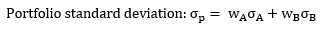

(note: to be discussed if correct...)

In [ ]:
w2

In [ ]:
subset

In [ ]:
# formula
std2 =  w2[0] * subset.loc["WMT", "Risk"] + w2[1] * subset.loc["AAPL", "Risk"] 
std2

In [ ]:
# vectorized
std2 = subset.Risk.dot(w2)
std2

In [ ]:
# vectorized for many portfolios
port_risk = subset.Risk.dot(weights.T)
port_risk

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 10, color = "red")
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.005, subset.loc[i, "Return"] - 0.005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

Straight Line -> No Diversification Effect!

__Complete/Correct Formula:__

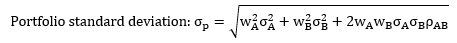

__Special Case__: if ρ_AB (Correlation) == 1 (perfect positive correlation):


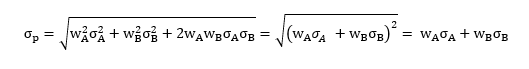

-> No Diversification Effect only if assets are __prefectly correlated__. If not, Portfolio Risk is __below weighted average Risk__!

__-> As long as correlation is below 1, there is a risk diversification effect!__

## Crash Course Statistics: Variance and Standard Deviation 

In [ ]:
returns

In [ ]:
returns = returns[assets].copy()
returns

__Variance__

In [ ]:
var = returns.var()
var

__Standard Deviation__

In [ ]:
std = returns.std()
std

__Relationship between Variance and Standard Deviation__

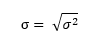

In [ ]:
std**2 # variance

In [ ]:
np.sqrt(var) # standard deviation

## Crash Course Statistics: Covariance and Correlation (Part 1)

In [ ]:
returns

In [ ]:
returns["WMT_neg"] = -returns.WMT
returns

In [ ]:
corr_matrix = returns.corr()
corr_matrix

In [ ]:
returns.plot(kind = "scatter", x = "WMT", y = "AAPL", figsize = (15, 10), fontsize = 15)
plt.xlabel("Returns WMT", fontsize = 13)
plt.ylabel("Returns AAPL", fontsize = 13)
plt.show()

__Correlation Coefficient:__ 

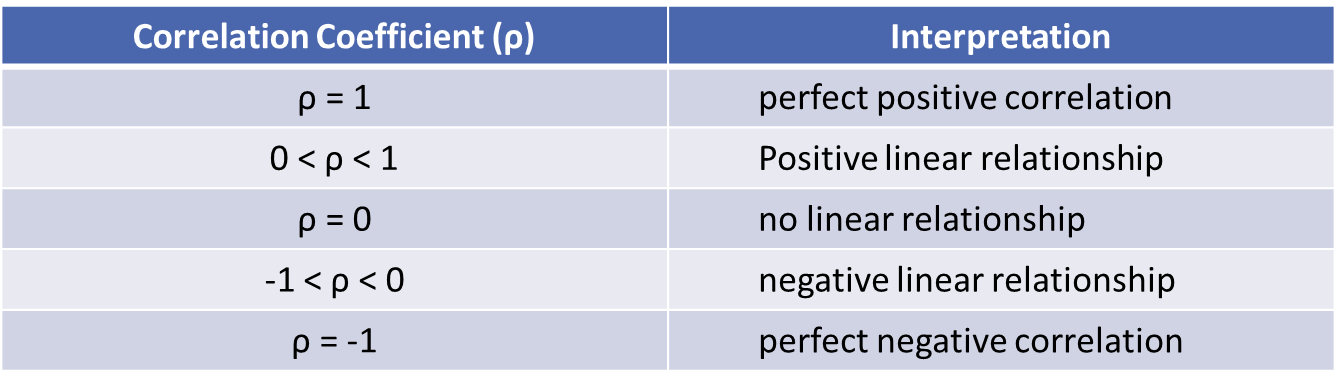

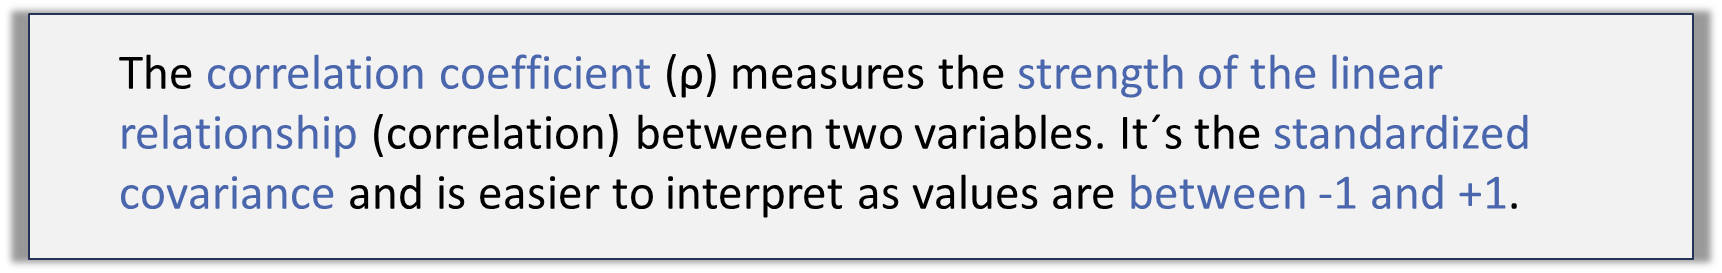

__Covariance__

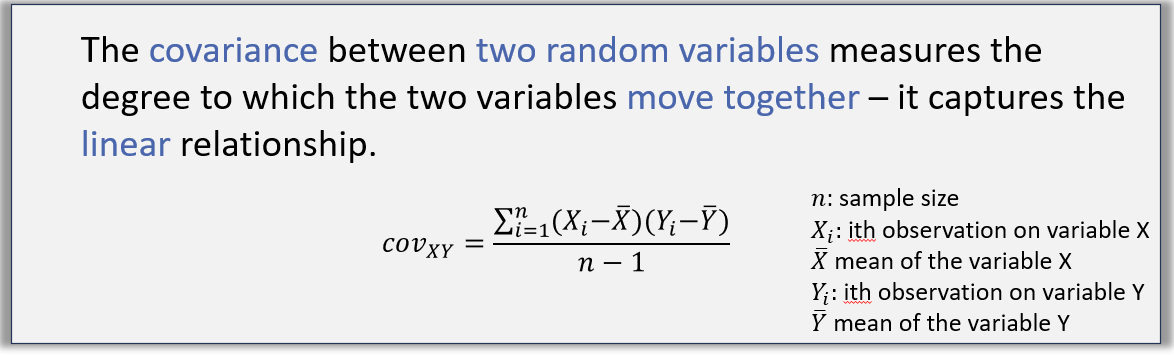

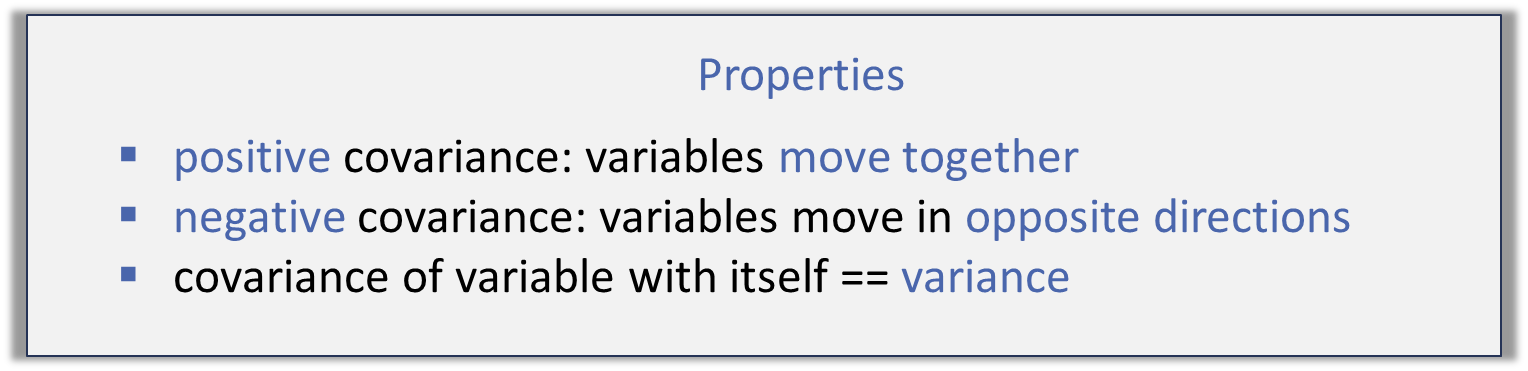

In [ ]:
cov_matrix = returns.cov()
cov_matrix

In [ ]:
returns.WMT.var()

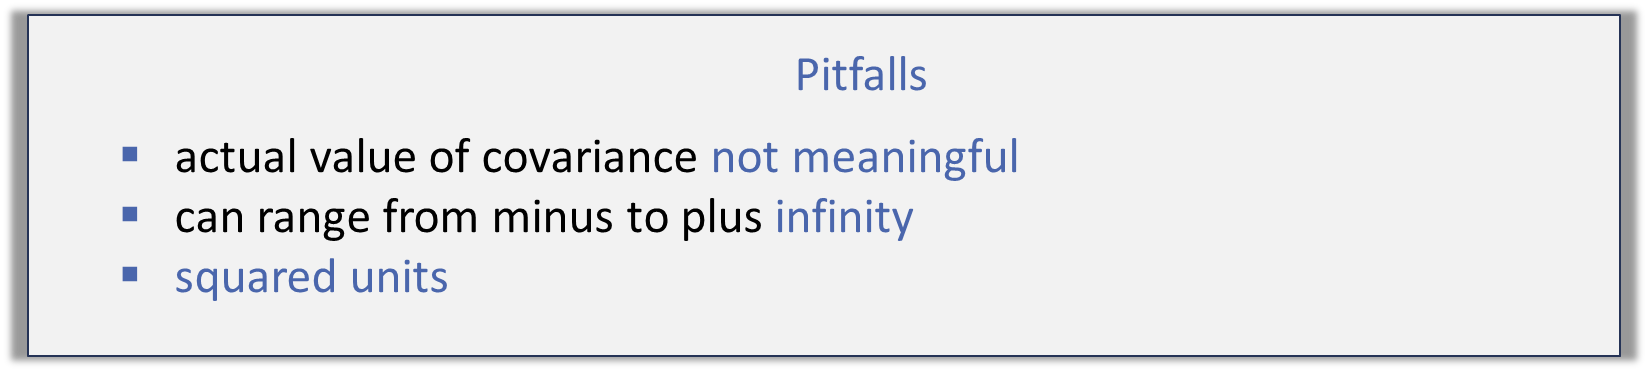

In [ ]:
returns.drop("WMT_neg", axis = 1, inplace = True)
returns

## Crash Course Statistics: Covariance and Correlation (Part 2)

In [ ]:
returns

In [ ]:
cov_matrix = returns.cov()
cov_matrix

In [ ]:
corr_matrix = returns.corr()
corr_matrix

__Relationship between Correlation and Covariance__

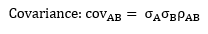

In [ ]:
corr_matrix.loc["WMT", "AAPL"] * np.sqrt(cov_matrix.loc["WMT", "WMT"]) * np.sqrt(cov_matrix.loc["AAPL", "AAPL"])

In [ ]:
cov_matrix.loc["WMT", "AAPL"]

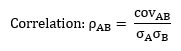

In [ ]:
cov_matrix.loc["WMT", "AAPL"] / (np.sqrt(cov_matrix.loc["WMT", "WMT"]) * np.sqrt(cov_matrix.loc["AAPL", "AAPL"]))

In [ ]:
corr_matrix.loc["WMT", "AAPL"]

## Portfolio Risk (2-Asset-Case) 

In [ ]:
weights

In [ ]:
w2

In [ ]:
subset

In [ ]:
# assuming perfect correlation (==1)
std2 = subset.Risk.dot(w2)
std2

__Formula (2-Asset-Case:)__

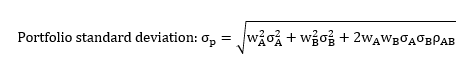

In [ ]:
cov_matrix # daily

In [ ]:
cov_matrix = cov_matrix * 252 # annual
cov_matrix

In [ ]:
corr_matrix

In [ ]:
np.sqrt(w2[0]**2*cov_matrix.loc["WMT", "WMT"] + w2[1]**2*cov_matrix.loc["AAPL", "AAPL"] + 2*w2[0]*w2[1]*np.sqrt(cov_matrix.loc["WMT", "WMT"])*np.sqrt(cov_matrix.loc["AAPL", "AAPL"])*corr_matrix.loc["WMT", "AAPL"])

__More general Formula (Linear Algebra):__

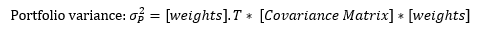

In [ ]:
np.sqrt(w2.dot(cov_matrix).dot(w2))

(more on linear algebra:)
https://en.wikipedia.org/wiki/Matrix_multiplication

__many portfolios:__

In [ ]:
np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))

## Correlation and the Portfolio Diversification Effect

In [ ]:
corr_matrix

-> moderate positve correlation <br>
-> there must be a __portfolio diversification effect__ (no straight line)

In [ ]:
port_ret

In [ ]:
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s = 10)
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.00005, subset.loc[i, "Return"]+0.00005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Now assuming various values for the Correlation Coefficient__ (everything else equal)

In [ ]:
corrs = [(-1, "green"), (-0.5, "yellow"), (0, "grey"), (0.5, "blue"), (1, "red")]

In [ ]:
weights

In [ ]:
subset

In [ ]:
cov_matrix

In [ ]:
port_ret

In [ ]:
plt.figure(figsize = (15, 9))
for corr in corrs:
    
    cov = corr[0] * np.sqrt(cov_matrix.iloc[0,0]) * np.sqrt(cov_matrix.iloc[1,1])
    cov_matrix.iloc[0,1] = cov
    cov_matrix.iloc[1,0] = cov
    port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
    
    plt.scatter(port_risk, port_ret, s = 10, color = corr[1],  label = "Corr == {}".format(corr[0]))
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.00005, subset.loc[i, "Return"]+0.00005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

-> Portfolio Diversification Effect: more Return for the same Risk / less Risk for the same Return (__"the only free lunch in the market"__)

## Multiple Asset Case

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

In [ ]:
assets = ["WMT", "AAPL", "BA"] # 3-Asset-Case
#assets = df.columns

In [ ]:
subset = df[assets].copy()
subset

In [ ]:
returns = subset.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

In [ ]:
noa = len(returns.columns) # number of assets
noa

In [ ]:
nop = 1000000 # number of random portfolios
nop

In [ ]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
matrix

In [ ]:
matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

__one portfolio__

In [ ]:
w1 = weights[0]
w1

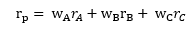

In [ ]:
# Linear Algebra
ret1 = summary.CAGR.dot(w1)
ret1

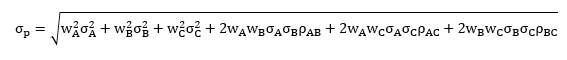

In [ ]:
# Linear Algebra
risk1 =  np.sqrt((w1.dot(cov_matrix).dot(w1)))
risk1

__multiple portfolios__

In [ ]:
port_ret = summary.CAGR.dot(weights.T)
port_ret

In [ ]:
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, color = "red")
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, color = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Optimization

__Challenge__: We need to __forecast__ inputs like __Covariance Matrix__ and __Returns__

__Simple Solution__: Use __past__ Covariance Matrix and Returns

__Problem__: Past performance is __not a (good) indicator__ for future performance (in particular Returns)

__Solution__:<br>
- using past Coveriance Matrix or variants of it (e.g. shrinkage) is widely accepted <br>
- using past Returns is not accepted (see pitfalls)
    

__Optimization Tools__:

We can, again, use __scipy optimizer__ (numerical/iterative optimization) or...

__Unbounded Optimization with Linear Algebra (formula based)__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

In [ ]:
assets = ["WMT", "AAPL", "MSFT"] # 3-Asset-Case
#assets = df.columns

In [ ]:
subset = df[assets].copy()
subset

In [ ]:
returns = subset.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

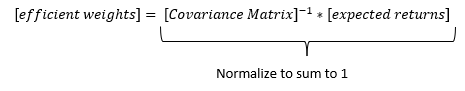

__Creating the inverse Covariance Matrix__ (beyond scope)

In [ ]:
cov_matrix_inv = pd.DataFrame(np.linalg.pinv(cov_matrix.values), cov_matrix.columns, cov_matrix.index)
cov_matrix_inv

In [ ]:
# matrix multiplication between a matrix and its inverse matrix gives identity matrix 
cov_matrix.dot(cov_matrix_inv) 

In [ ]:
w = cov_matrix_inv.dot(summary.CAGR) # see formula
w

In [ ]:
optimal_weights = (w/w.sum()) # normalize to 1
optimal_weights

In [ ]:
#summary

In [ ]:
# changing return inputs/assumptions
#summary.CAGR = summary.CAGR + np.array([0.02, 0.02, -0.02])
#summary

## Forward-looking Mean-Variance Optimization (MVO): Pitfalls

__typcial problems:__

- can lead to __short__ positions and positions __> 1__ (unbounded)
- will certainly lead to __concentrated__ portfolios (unbounded)
- highly dependent on & sensitive to __inputs/assumptions__ (return forecasts) -> GIGO
- small changes in forecasts (returns) lead to __large changes in weights__ (rebalancing costs!)
- __no guarantee__ that MVO-optimized Portfolio performs better than naive-diversified portfolio

__recap: bounded/contrained Optimization with Scipy__

In [ ]:
import scipy.optimize as sco 

In [ ]:
returns

In [ ]:
cov_matrix

In [ ]:
summary

In [ ]:
def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr

In [ ]:
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk

In [ ]:
def min_func_RaR(weights): 
     return -port_ret(weights) / port_vol(weights) 

In [ ]:
noa = len(summary)
noa

In [ ]:
eweigths = np.full(noa, 1/noa)
eweigths

In [ ]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [ ]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

In [ ]:
opts = sco.minimize(min_func_RaR, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [ ]:
opts

In [ ]:
optimal_weights = opts["x"]
optimal_weights

In [ ]:
pd.Series(data = optimal_weights, index = summary.index).sort_values(ascending = False).head(20)

In [ ]:
cagr_opt = port_ret(optimal_weights)
cagr_opt

In [ ]:
vol_opt = port_vol(optimal_weights)
vol_opt

In [ ]:
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

## Introduction of a Risk-Free Asset

__Risky Assets__: Stocks, Corporate Bonds, Commodities, Cryptocurrencies, etc. (__volatility & uncertain outcomes__) <br>
__Risk-free Asset__: Short-Term Government Bond (USA, Germany): __known outcome__ (Coupon Rate / Yield)

In [ ]:
# return of risk-free asset
rf = 0.03

In [ ]:
# risk / standard deviation of risk-free asset
rfr = 0

In addition: Zero Correlation with risky assets.

Better metric for risk-adjusted return: __Sharpe Ratio__

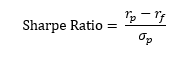

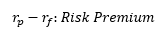

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

In [ ]:
#assets = ["WMT", "AAPL", "MSFT"] # 3-Asset-Case
assets = df.columns

In [ ]:
subset = df[assets].copy()
subset

In [ ]:
returns = subset.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
summary["Sharpe"] = (summary.CAGR - rf) / summary["ann. Risk"]
summary

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

In [ ]:
noa = len(returns.columns) # number of assets
noa

In [ ]:
nop = 1000000 # number of random portfolios
nop

In [ ]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

In [ ]:
port_ret = summary.CAGR.dot(weights.T)
port_ret

In [ ]:
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

In [ ]:
sharpe_ratio = (port_ret - rf) / port_risk
sharpe_ratio

In [ ]:
sharpe_ratio.min()

In [ ]:
sharpe_ratio.max()

In [ ]:
summary.loc["Rf"] = [rfr, rf, np.nan]

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, c = sharpe_ratio, cmap = "coolwarm", vmin = 0.5, vmax = 1)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, c = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlim(0, 0.65)
plt.ylim(-0.25, 0.65)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## The Sharpe Ratio: Graphical Interpretation

__Example: Sharpe Ratio MSFT__

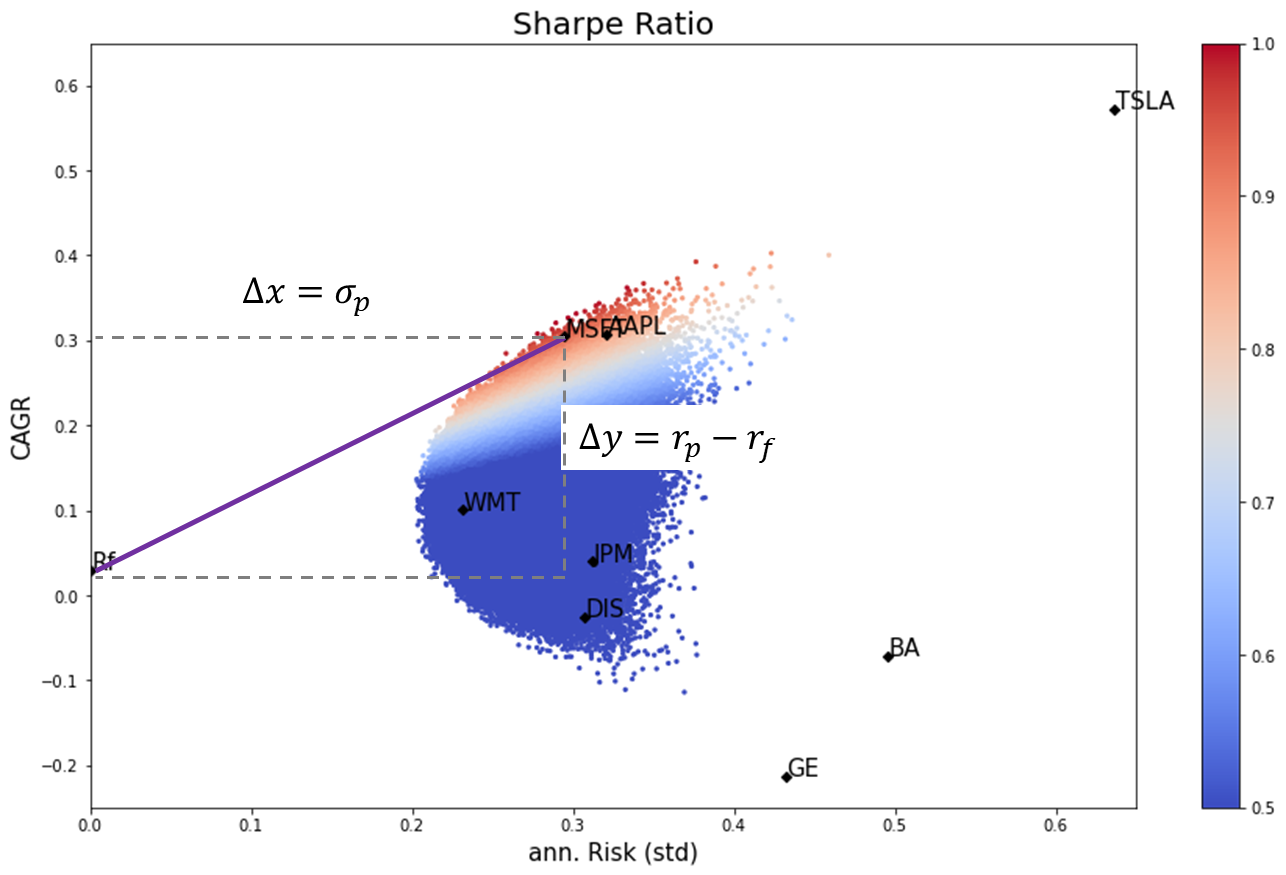

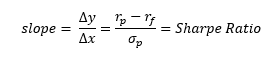

-> The __Sharpe Ratio__ of an Asset/Portfolio can be interpreted as the __Slope__ of the straight line connecting the __Asset/Portfolio with the Risk-free Asset__.

## Portfolio Optimization with Risk-free Asset (Part 1)

__Portfolio Optimization__: Finding the Portfolio with the __highest Sharpe Ratio__

__Graphical Solution__: Drawing a Tangency line from Risk-Free Asset to Efficient Frontier -> __Tangency Portfolio__

In [ ]:
import scipy.optimize as sco

In [ ]:
summary.drop(index = "Rf", inplace = True)
summary

In [ ]:
def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr

In [ ]:
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk

In [ ]:
def sharpe(weights): 
     return -(port_ret(weights)-rf) / port_vol(weights) 

In [ ]:
noa = len(summary)
noa

In [ ]:
eweigths = np.full(noa, 1/noa)
eweigths

__Efficient Frontier__

In [ ]:
# portfolio return == tcagr
cons = ({"type": "eq", "fun": lambda x: port_ret(x)-tcagr},
       {"type": "eq", "fun": lambda x: np.sum(x) -1})

In [ ]:
tcagrs = np.linspace(summary.CAGR.min(), summary.CAGR.max(), 500)
tcagrs

In [ ]:
bnds =  tuple((0, 1) for x in range(noa))
bnds

In [ ]:
vols = []

In [ ]:
#for each target return, find the portfolio with the lowest volatility
for tcagr in tcagrs:
    res = sco.minimize(port_vol, eweigths, method = "SLSQP", bounds= bnds, constraints= cons)
    vols.append(res["fun"])
vols = np.array(vols)

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Efficient Frontier", fontsize = 20)
plt.show()

## Portfolio Optimization with Risk-free Asset (Part 2)

__Optimization (max Sharpe Ratio)__

In [ ]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [ ]:
opts = sco.minimize(sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [ ]:
opts

In [ ]:
optimal_weights = opts["x"]
optimal_weights

In [ ]:
pd.Series(data = optimal_weights, index = summary.index).sort_values(ascending = False).head(20)

In [ ]:
cagr_opt = port_ret(optimal_weights)
cagr_opt

In [ ]:
vol_opt = port_vol(optimal_weights)
vol_opt

In [ ]:
sharpe_opt = -sharpe(optimal_weights)
sharpe_opt 

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs)
plt.scatter(rfr, rf, s= 50, marker = "D", c = "red")
plt.annotate("Rf", xy= (rfr+0.01, rf+0.01), size = 15)
plt.scatter(vol_opt, cagr_opt, s= 50, marker = "D", c = "green")
plt.annotate("MSRP", xy= (vol_opt+0.0, cagr_opt+0.02), size = 15)
plt.plot(np.array([0, 0.6]), rf+sharpe_opt*np.array([0, 0.6]), label = "Capital Market Line (CML)")
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

__(Unbounded) Optimization with Linear Algebra__:

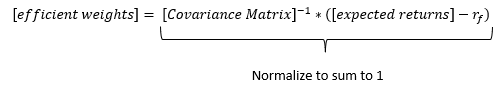

## Implications and the Two-Fund-Theorem

If __all risky assets__ (that exist) are included:

- __Capital Market Line (CML)__ is the new __Efficient Frontier__ with all efficient Portfolios. 
- -> The __MSRP__ is the only __efficient risky Portfolio__. 
- -> __CML__ can be interpreted as set of __Portfolios consisting of Rf and MSRP__
- -> Every Investor should hold a __combination of Rf and MSRP__ (Two-Fund-Theorem).
- -> MSRP also called __Market Portfolio__ (MP). 

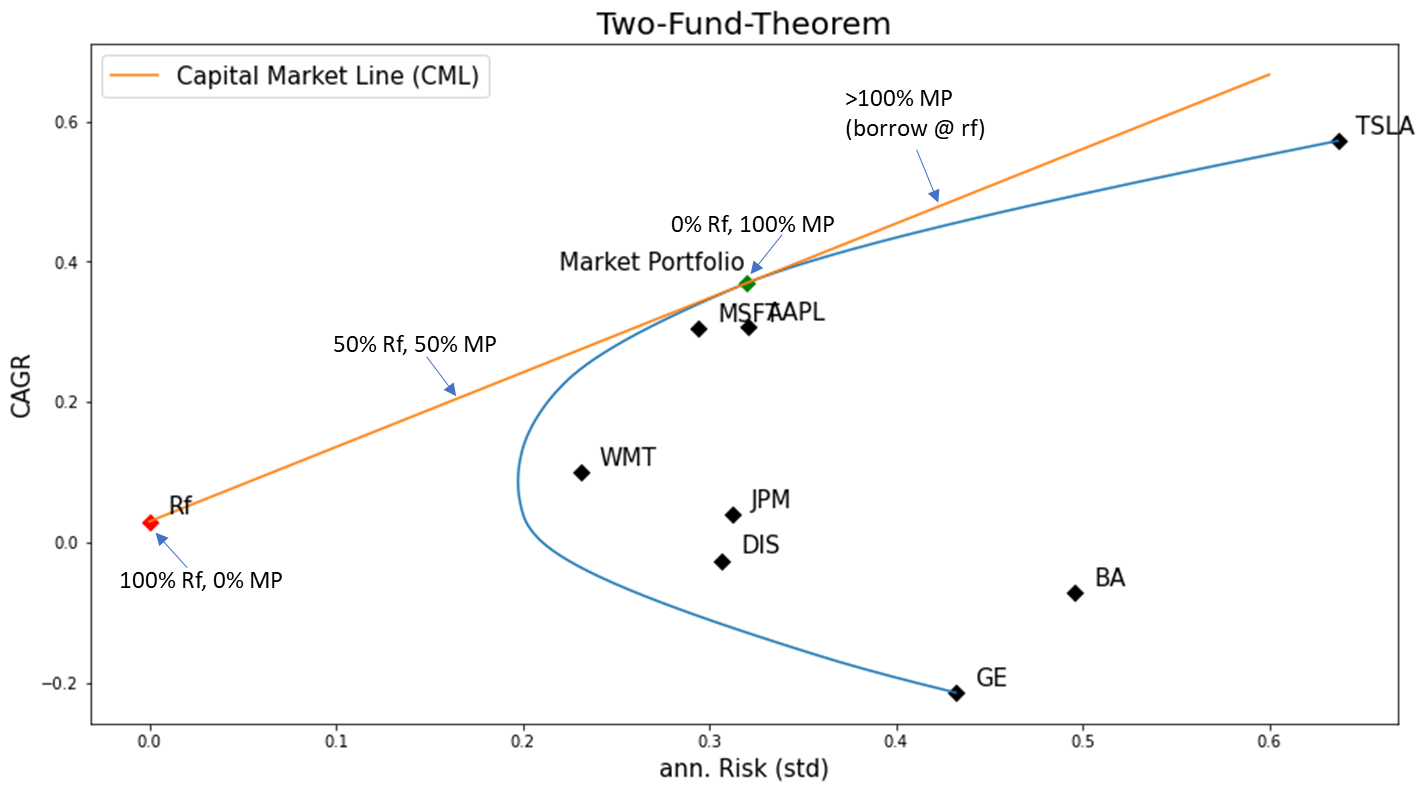